In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest

es5m_df = pd.read_csv("C:\\Users\\Shuv\\Documents\\All Trading\\Market Data\\Research Data\\Chart_ES_12Oct21.csv")

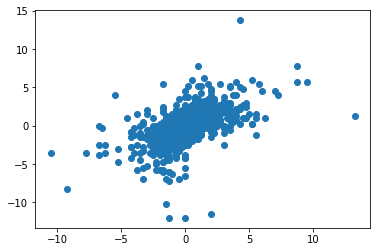

High diff: mean=-0.007 stdv=1.989
Low Diff: mean=-0.007 stdv=2.136


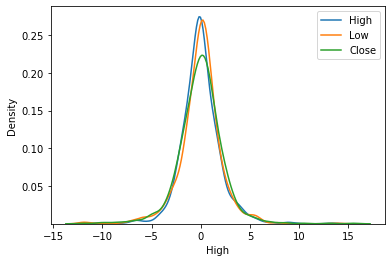

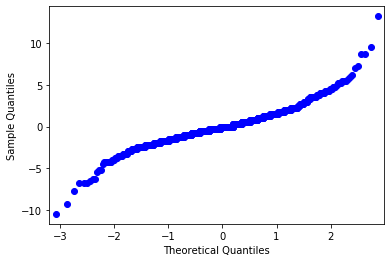

Statistics=nan, pHigh=1.0000
Statistics=nan, pLow=1.0000
High Sample looks Gaussian (fail to reject H0)
Low Sample looks Gaussian (fail to reject H0)
Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


In [4]:
#Plot the change in High,Low,Close and see how the distribution looks(for all times)
# Visually all looks Normal/Gaussian (This might be our prior Distribution)
#es5m_df

#Check visually if the High & Low change are correlated : In excel it returns a corr_coeff= 0.55 which is moderately correlated
data1 = es5m_df['High'].diff(); data2 = es5m_df['Low'].diff(); 
pyplot.scatter(data1, data2)
pyplot.show()
print('High diff: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('Low Diff: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

sns.kdeplot(es5m_df['High'].diff())
sns.kdeplot(es5m_df['Low'].diff())
sns.kdeplot(es5m_df['Close'].diff())
plt.legend(labels = ['High','Low', 'Close'])


qqplot(es5m_df['High'].diff(), line='s')
pyplot.show()

#Run Normality test
datahigh = es5m_df['High'].diff()
datalow = es5m_df['Low'].diff()
# Shapiro normality test
stath, p_high = shapiro(datahigh)
statl, p_low = shapiro(datalow)
print('Statistics=%.3f, pHigh=%.4f' % (stath , p_high))
print('Statistics=%.3f, pLow=%.4f' % (statl , p_low))
# interpret
alpha = 0.05
if p_high > alpha:
    print('High Sample looks Gaussian (fail to reject H0)')
else:
    print('High Sample does not look Gaussian (reject H0)')
    
if p_low > alpha:
    print('Low Sample looks Gaussian (fail to reject H0)')
else:
    print('Low Sample does not look Gaussian (reject H0)')    
    
# Another Normality test
stat, p = normaltest(datalow)
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

# The below code extracts the data from period of high volatility(US Open for ES & NQ),
and plots the distriubution
#FINDINGS: The change in (High,Low) seems Bi-modal in nature

In [41]:

import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#es5m_df.loc[es5m_df['Time'] > '10/12/2021 10:10']
new_es5m_df = es5m_df.copy()
voltimehigh = []; voltimelow = []
#Pick the High,Low prices in the 1st hour of US open i.e high volatility and liquidity,14:30 BST
# Uncomment the for loop if you want to filter using traditional method
# for i in range(len(new_es5m_df)):
#     rules = [datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('14:20','%H:%M'),
#             datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') < datetime.strptime('21:05','%H:%M')]
#     if all(rules):
#         voltimehigh.append(new_es5m_df.iloc[i]['High'])
#         voltimelow.append(new_es5m_df.iloc[i]['Low'])

# USE of MAP & (Nested)FILTER !!        
def mystrptime(x):
   return datetime.strptime(x[x.find(":")-2:],'%H:%M')

x1 = map(mystrptime, new_es5m_df['Time'])
#print(list(x1))
#x = datetime.strptime(new_es5m_df['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M')
y = filter(lambda x2: x2 < datetime.strptime('15:30','%H:%M'),filter(lambda x: (x > datetime.strptime('14:30','%H:%M')), x1))

voltimehigh = filter(lambda s: s['Time']==map(mystrptime, y),new_es5m_df)
print(list(voltimehigh))
        
#Plot the high volatile data
#High Low plot shows somehow Bi-Modal distribution(if we consider 1st hour of US opening)
sns.kdeplot(pd.Series(voltimehigh).diff())
sns.kdeplot(pd.Series(voltimelow).diff())
plt.legend(labels = ['High','Low'])

#Now Test Normality
stath, p_high = shapiro(pd.Series(voltimehigh).diff())
statl, p_low = shapiro(pd.Series(voltimehigh).diff())
print('Statistics=%.3f, pHigh=%.4f' % (stath , p_high))
print('Statistics=%.3f, pLow=%.4f' % (statl , p_low))
# interpret
alpha = 0.05
if p_high > alpha:
    print('High Sample looks Gaussian (fail to reject H0)')
else:
    print('High Sample does not look Gaussian (reject H0)')
    
if p_low > alpha:
    print('Low Sample looks Gaussian (fail to reject H0)')
else:
    print('Low Sample does not look Gaussian (reject H0)')     
    
plot_acf(pd.Series(voltimehigh).diff().dropna(),lags=20)
plot_pacf(pd.Series(voltimehigh).diff().dropna(),lags=20)

plot_acf(pd.Series(voltimelow).diff().dropna(),lags=20)
plot_pacf(pd.Series(voltimelow).diff().dropna(),lags=20)

plt.show()    

TypeError: string indices must be integers

In [114]:
dt = datetime.strptime(new_es5m_df.iloc[1]['Time'],'%m/%d/%Y %H:%M')
dt.hour
type(new_es5m_df.iloc[1]['Time'])

str

In [135]:
# Test of stionarity
import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
result = adfuller(pd.Series(voltimehigh).diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.898082
p-value: 0.002049
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [108]:
#Utility to compare extract & compare time, for purpose of extracting data in high volatile period
# re.search is not needed
import re
f=re.search("/",new_es5m_df.iloc[1]['Time'])
datetime.strptime(new_es5m_df.iloc[1]['Time'][new_es5m_df.iloc[1]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('23:05','%H:%M')

False

# AWESOME USE of MAP & NESTED FILTER !!

In [59]:
#Try filter and Map function
# for i in range(len(new_es5m_df)):
#     rules = [datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') > datetime.strptime('14:20','%H:%M'),
#             datetime.strptime(new_es5m_df.iloc[i]['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M') < datetime.strptime('21:05','%H:%M')]
#     if all(rules):
#         voltimehigh.append(new_es5m_df.iloc[i]['High'])
#         voltimelow.append(new_es5m_df.iloc[i]['Low'])
#Now try the above logic with filter function
def unfilter(x):
   x1 =  datetime.strftime(x,'%d %m %Y %H:%M')
   return x1[x1.find(":")-2:]

def mystrptime(x):
   return datetime.strptime(x[x.find(":")-2:],'%H:%M')

x1 = map(mystrptime, new_es5m_df['Time'])
#print(list(x1))
#x = datetime.strptime(new_es5m_df['Time'][new_es5m_df.iloc[i]['Time'].find(":")-2:] ,'%H:%M')
y = filter(lambda x2: x2 < datetime.strptime('15:30','%H:%M'),filter(lambda x: (x > datetime.strptime('14:30','%H:%M')), x1))
y1 = map(unfilter, y)
print (list(y1))
y2 = filter(lambda rec: datetime.strptime(rec['Time'],'%H:%M')==y1,new_es5m_df)
print(list(y2))

['14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25', '14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25', '14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25']


TypeError: string indices must be integers

In [61]:
x= 'hhhghg'
x[x.find('g'):]

'ghg'

In [44]:
type(new_es5m_df.iloc[1]['Time'])
datetime.datetime(1900, 1, 1, 14, 35) 

str